In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
101983,너불 (nubulswamp),너래방,"시청자 1,022명",Just Chatting,2022-10-04 21:50:05.606238
101984,까막 (smartcrow),돌아온 귀곡팔황 / 최고 난이도,"시청자 1,001명",Tale of Immortal,2022-10-04 21:50:05.606238
101985,핑맨 (95pingman),[핑맨] ????,시청자 999명,Just Chatting,2022-10-04 21:50:05.606238
101986,양아지 (dkwl025),시청자 직업 게시판 탐방,시청자 913명,토크쇼 및 팟캐스트,2022-10-04 21:50:05.606238
101987,인간젤리 (ses836),인간젤리 안녕하세요~,시청자 908명,Just Chatting,2022-10-04 21:50:05.606238


In [3]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [4]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [5]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
101938,한동숙 (handongsuk),화요일,2만,Just Chatting,2022-10-04 21:50:05.606238
101939,우왁굳 (woowakgood),고멤 OGQ 쿨 돌았다,1.4만,Just Chatting,2022-10-04 21:50:05.606238
101940,풍월량 (hanryang1125),[광고] 스플래툰3 침착맨 다주 옥냥이 풍월량,1.3만,Splatoon 3,2022-10-04 21:50:05.606238
101941,고세구___ (gosegugosegu),[V] 발로란트 배치고사... 최소 골드 드개재ㅐ!!!!,1.1만,VALORANT,2022-10-04 21:50:05.606238


In [6]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
101938    20500.0
101939    14500.0
101940    13500.0
101941    11500.0
101942    11500.0
Name: 시청자수, Length: 3572, dtype: float64

In [7]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [8]:
df.loc[df2.index, '시청자수'] = df2

In [9]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [10]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [11]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
101983       1022
101984       1001
101985        999
101986        913
101987        908
Name: 시청자수, Length: 101966, dtype: object

In [12]:
df['시청자수'] = df['시청자수'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101966 entries, 0 to 101987
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      101966 non-null  object
 1   제목      101966 non-null  object
 2   시청자수    101966 non-null  int32 
 3   카테고리    101966 non-null  object
 4   일시      101966 non-null  object
dtypes: int32(1), object(4)
memory usage: 4.3+ MB


In [14]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [15]:
df1 = df

In [16]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,27962.356490
우왁굳 (woowakgood),17162.473227
한동숙 (handongsuk),15748.700491
풍월량 (hanryang1125),15411.183299
enchantenter,15408.673152
아이네_ (vo_ine),14132.648515
침착맨 (zilioner),11813.174081
릴파_ (lilpaaaaaa),11220.189744
valorant_kr,10415.678571


In [17]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
다주 (dda_ju),"(광고) 스플래툰3 (w.침착맨님,풍월량님,옥냥이님)",5077,Splatoon 3,2022-10-04 21:30:05.889398
다주 (dda_ju),"(광고) 스플래툰3 (w.침착맨님,풍월량님,옥냥이님)",4852,Splatoon 3,2022-10-04 21:35:05.319355
다주 (dda_ju),"(광고) 스플래툰3 (w.침착맨님,풍월량님,옥냥이님)",4607,Splatoon 3,2022-10-04 21:40:05.381871


In [18]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '다주 (dda_ju)', '다주 (dda_ju)', '다주 (dda_ju)', '다주 (dda_ju)',
       '다주 (dda_ju)', '다주 (dda_ju)', '다주 (dda_ju)', '다주 (dda_ju)',
       '다주 (dda_ju)', '다주 (dda_ju)'],
      dtype='object', name='이름', length=6299)

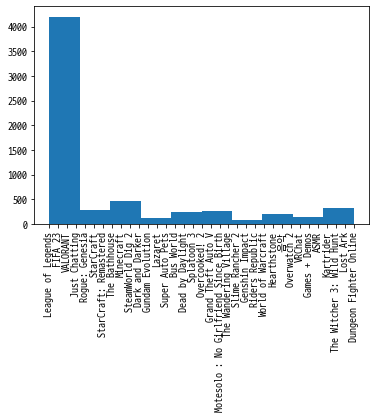

In [19]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [23]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
101739,풍월량 (hanryang1125),[광고] 스플래툰3 침착맨 다주 옥냥이 풍월량,13500,Splatoon 3,2022-10-04 21:30:05.889398
101790,풍월량 (hanryang1125),[광고] 스플래툰3 침착맨 다주 옥냥이 풍월량,13500,Splatoon 3,2022-10-04 21:35:05.319355
101840,풍월량 (hanryang1125),[광고] 스플래툰3 침착맨 다주 옥냥이 풍월량,13500,Splatoon 3,2022-10-04 21:40:05.381871
101890,풍월량 (hanryang1125),[광고] 스플래툰3 침착맨 다주 옥냥이 풍월량,13500,Splatoon 3,2022-10-04 21:45:06.048694


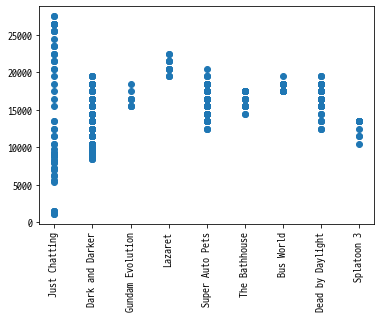

In [24]:
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([ 64., 139.,  10.,  14.,   0.,  97.,  27.,  36.,  89.,  15.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

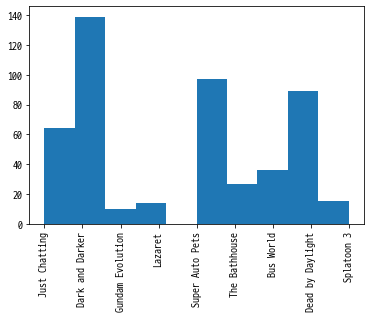

In [28]:
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'])

In [29]:
df_p['카테고리'].value_counts()

Dark and Darker     139
Super Auto Pets      97
Dead by Daylight     89
Just Chatting        64
Bus World            36
The Bathhouse        27
Splatoon 3           15
Lazaret              14
Gundam Evolution     10
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자